<a href="https://colab.research.google.com/github/RamosGoat/Projects/blob/main/Yulu_Case_Study_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/bike_sharing.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01/01/2011 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,01/01/2011 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,01/01/2011 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,01/01/2011 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,01/01/2011 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,19/12/2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,19/12/2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,19/12/2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,19/12/2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
Cat_var = ['season', 'holiday', 'workingday', 'weather']
Num_var = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']


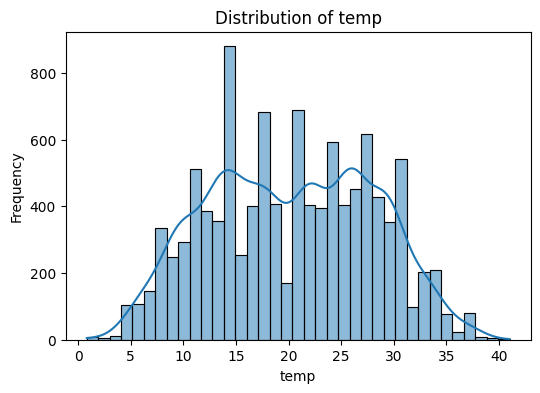

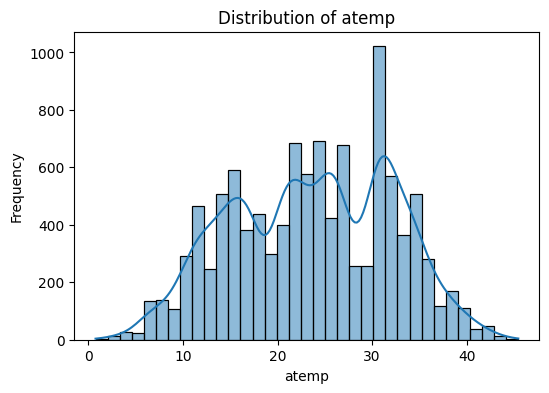

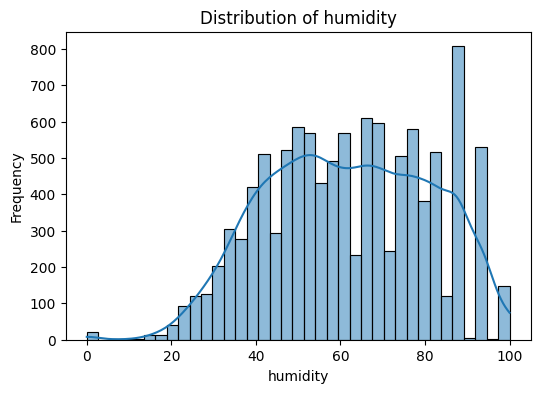

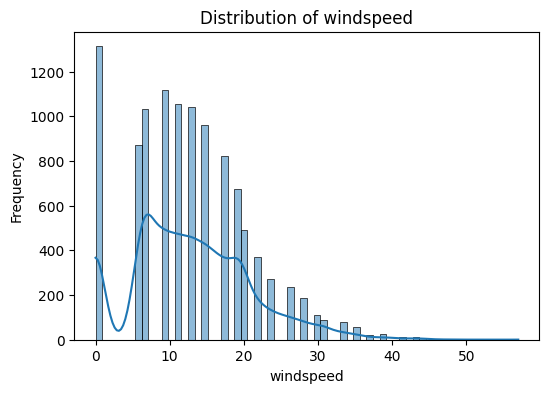

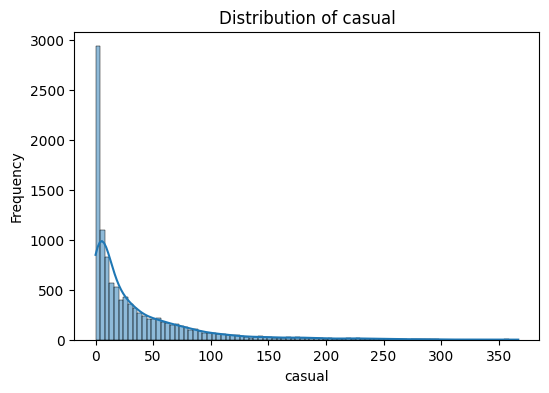

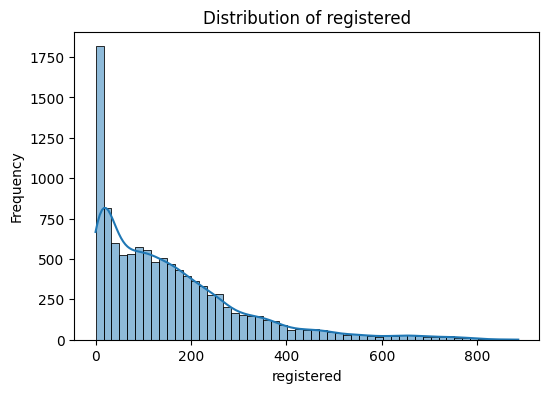

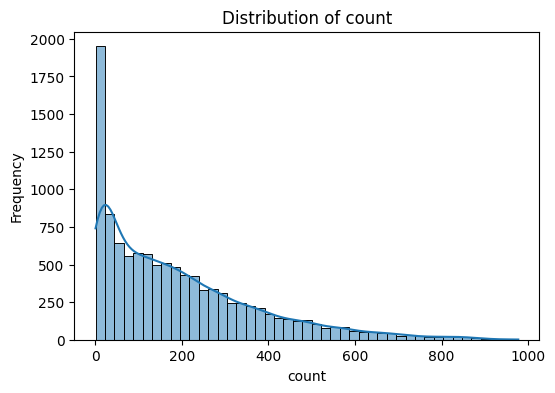

In [ ]:
for feature in Num_var:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

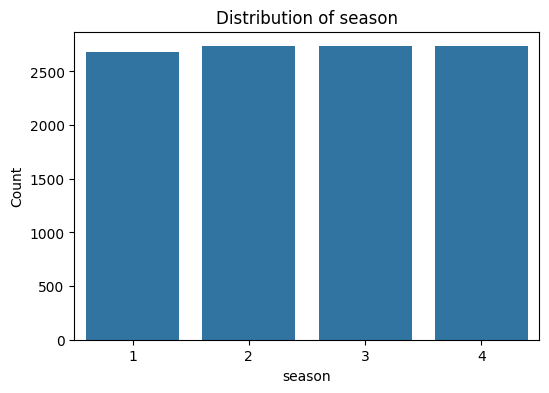

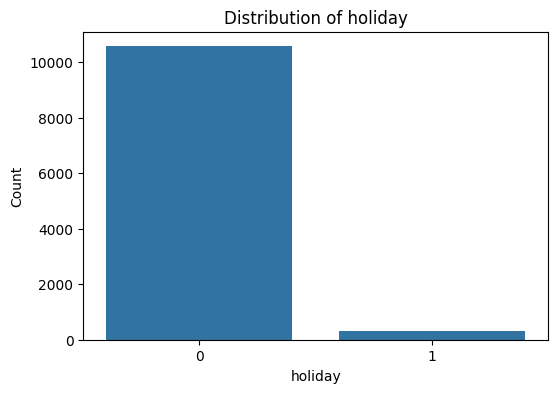

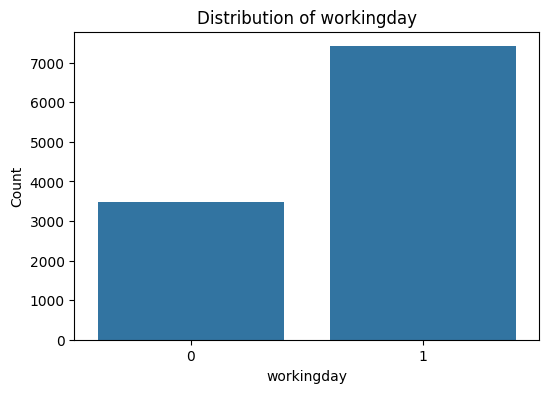

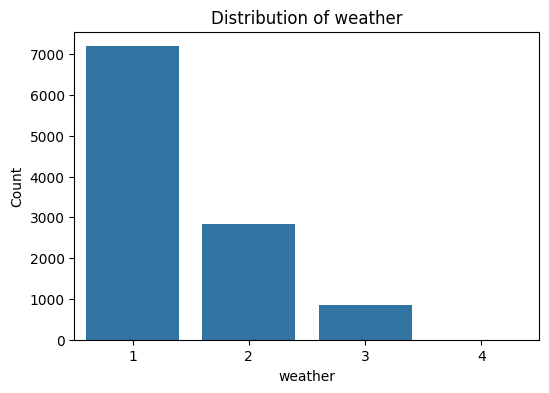

In [ ]:
for feature in Cat_var:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

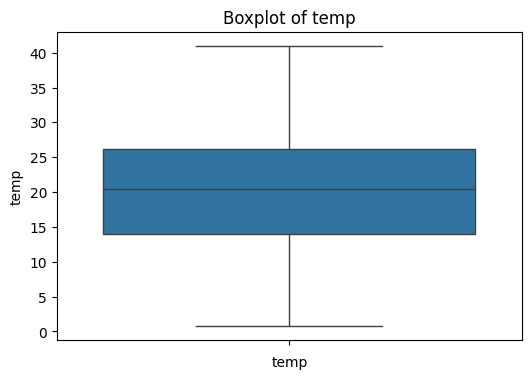

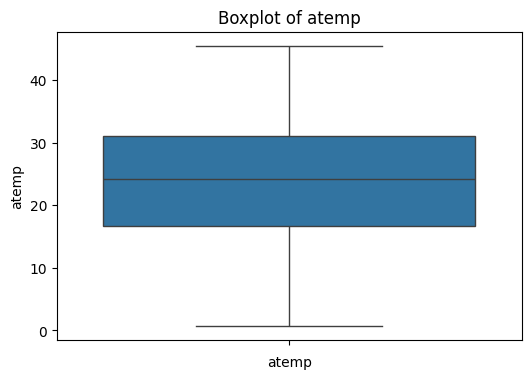

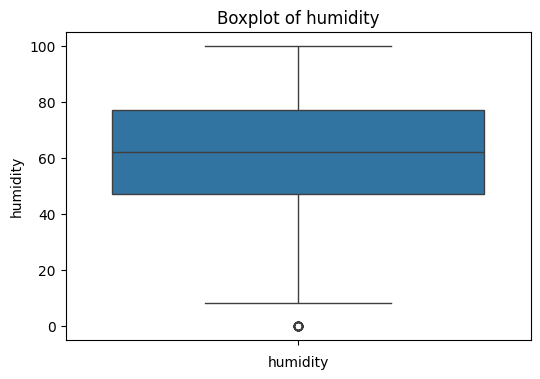

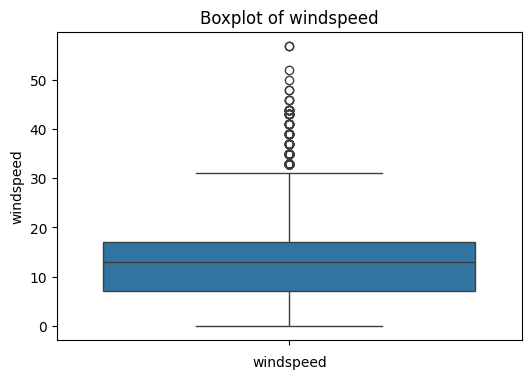

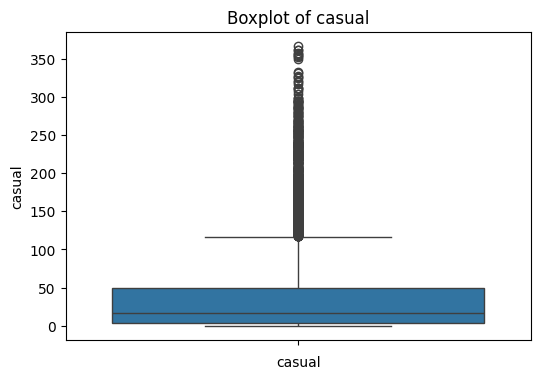

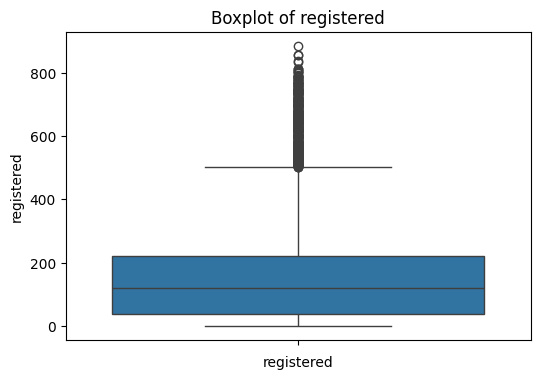

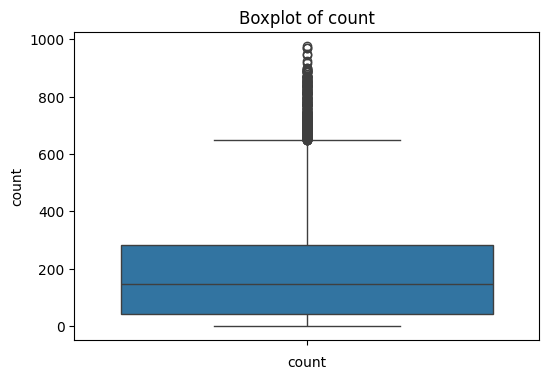

In [ ]:
for feature in Num_var:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
for feature in Num_var:
    df_Outlier_removed = remove_outliers(df, feature)

In [ ]:
df_Outlier_removed.shape

(10586, 12)

In [ ]:
outliers = df.shape[0] - df_Outlier_removed.shape[0]
outliers

300

In [ ]:
df= df_Outlier_removed

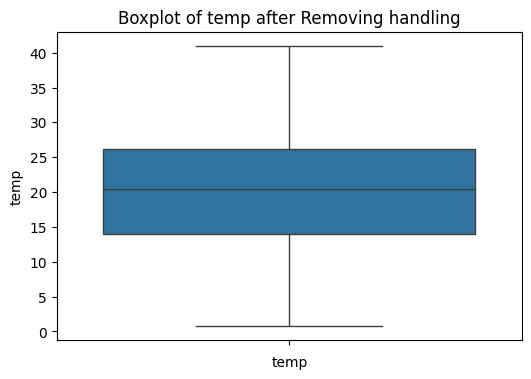

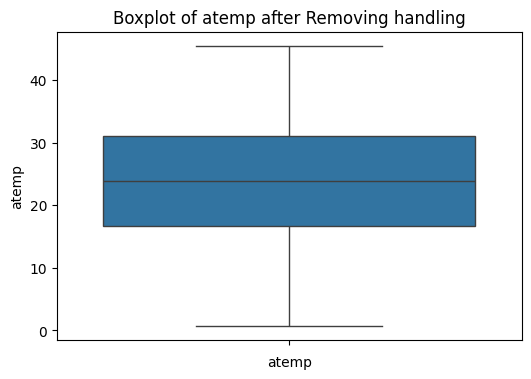

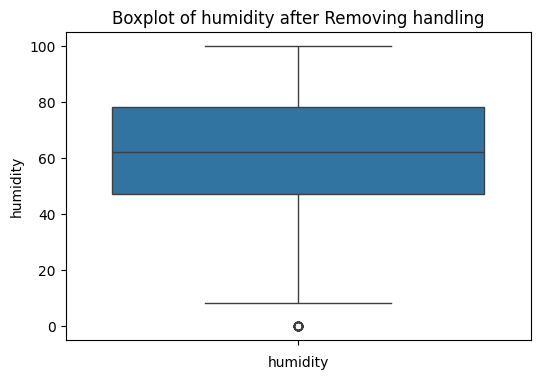

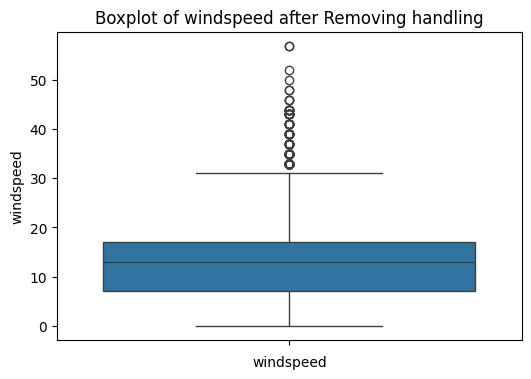

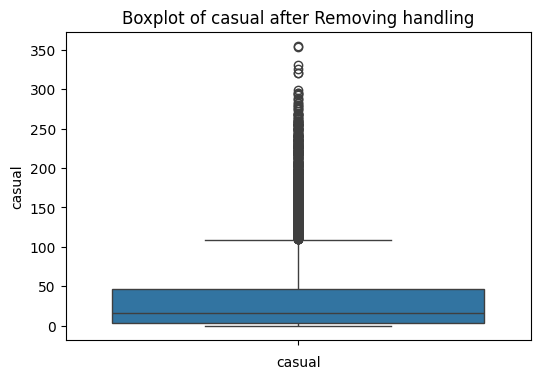

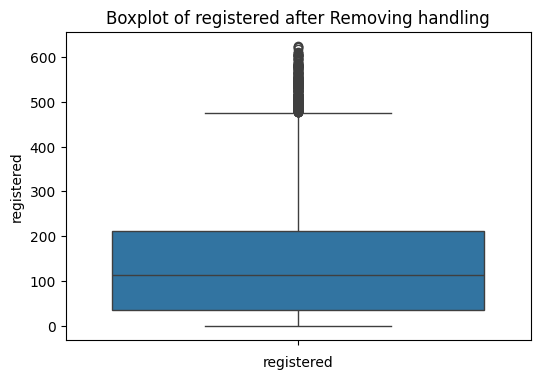

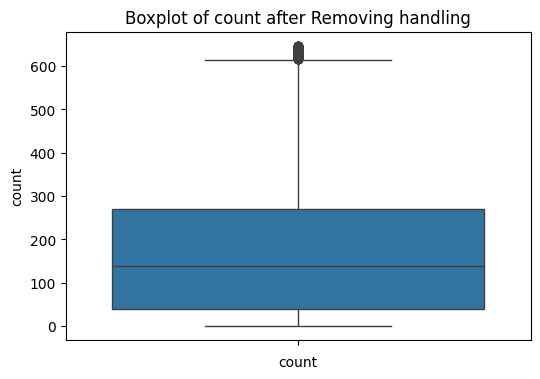

In [ ]:
for feature in Num_var:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_Outlier_removed[feature])
    plt.title(f'Boxplot of {feature} after Removing handling')
    plt.xlabel(feature)
    plt.show()

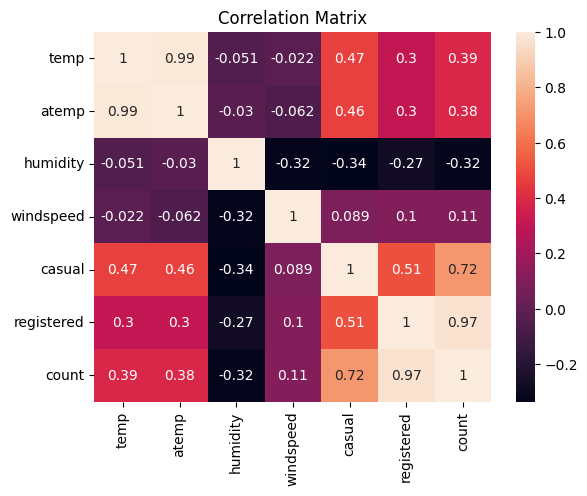

In [ ]:
corr_matrix = df_Outlier_removed[Num_var].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print(corr_matrix)

                temp     atemp  humidity  windspeed    casual  registered  \
temp        1.000000  0.985887 -0.051216  -0.021912  0.468614    0.304585   
atemp       0.985887  1.000000 -0.030373  -0.062398  0.463624    0.302263   
humidity   -0.051216 -0.030373  1.000000  -0.319719 -0.335296   -0.274223   
windspeed  -0.021912 -0.062398 -0.319719   1.000000  0.088725    0.102881   
casual      0.468614  0.463624 -0.335296   0.088725  1.000000    0.513744   
registered  0.304585  0.302263 -0.274223   0.102881  0.513744    1.000000   
count       0.388065  0.384680 -0.323363   0.110181  0.717512    0.966215   

               count  
temp        0.388065  
atemp       0.384680  
humidity   -0.323363  
windspeed   0.110181  
casual      0.717512  
registered  0.966215  
count       1.000000  


In [ ]:
# Identifying highly correlated pairs (threshold > 0.85)
threshold = 0.85
highly_correlated_pairs = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.add((corr_matrix.columns[i], corr_matrix.columns[j]))

# Print highly correlated pairs
print("Highly correlated pairs:", highly_correlated_pairs)

# Remove one feature from each highly correlated pair
features_to_remove = set([pair[0] for pair in highly_correlated_pairs])
df_reduced = df.drop(columns=features_to_remove)

Highly correlated pairs: {('count', 'registered'), ('atemp', 'temp')}


In [ ]:
numerical_features_reduced = [col for col in Num_var if col not in features_to_remove]
corr_matrix_reduced = df_reduced[numerical_features_reduced].corr()
corr_matrix_reduced

,temp,humidity,windspeed,casual,registered
temp,1.000000,-0.051216,-0.021912,0.468614,0.304585
humidity,-0.051216,1.000000,-0.319719,-0.335296,-0.274223
windspeed,-0.021912,-0.319719,1.000000,0.088725,0.102881
casual,0.468614,-0.335296,0.088725,1.000000,0.513744
registered,0.304585,-0.274223,0.102881,0.513744,1.000000


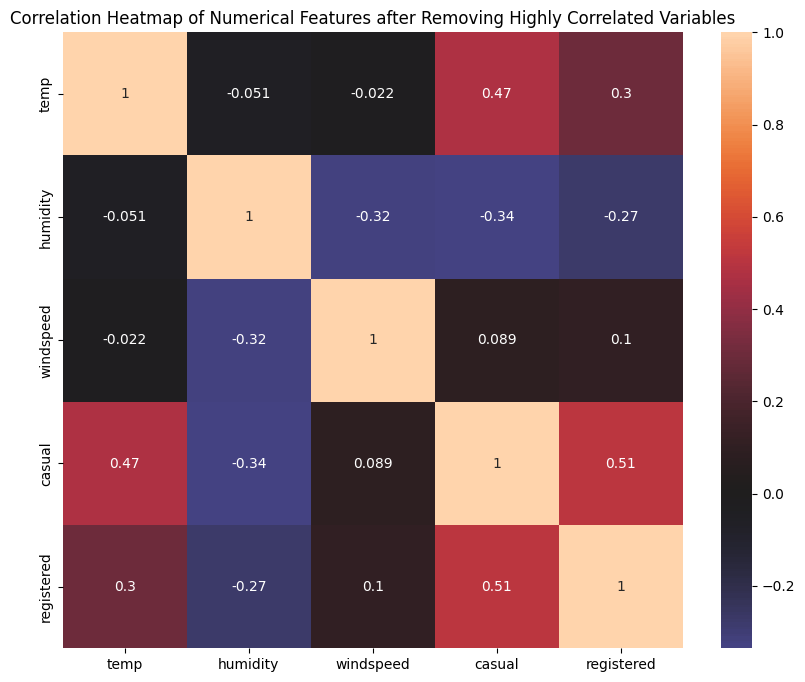

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_reduced, annot=True,center=0)
plt.title('Correlation Heatmap of Numerical Features after Removing Highly Correlated Variables')
plt.show()

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01/01/2011 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,01/01/2011 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,01/01/2011 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,01/01/2011 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,01/01/2011 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,19/12/2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,19/12/2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,19/12/2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,19/12/2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
from scipy import stats
df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y %H:%M')
df['day_of_week'] = df['datetime'].dt.dayofweek
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')
weekday_counts = df[df['day_type'] == 'Weekday']['count']
weekend_counts = df[df['day_type'] == 'Weekend']['count']

<ipython-input-25-590816f01ad9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y %H:%M')
<ipython-input-25-590816f01ad9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['datetime'].dt.dayofweek
<ipython-input-25-590816f01ad9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [ ]:
t_stat, p_value = stats.ttest_ind(weekday_counts, weekend_counts)
t_stat, p_value

(-2.3533038555187638, 0.018625612801713553)

In [ ]:
if p_value < 0.05:
    print("There is a significant difference between the number of bike rides on weekdays and weekends.")
else:
    print("There is no significant difference between the number of bike rides on weekdays and weekends.")

There is a significant difference between the number of bike rides on weekdays and weekends.


<Figure size 600x600 with 0 Axes>

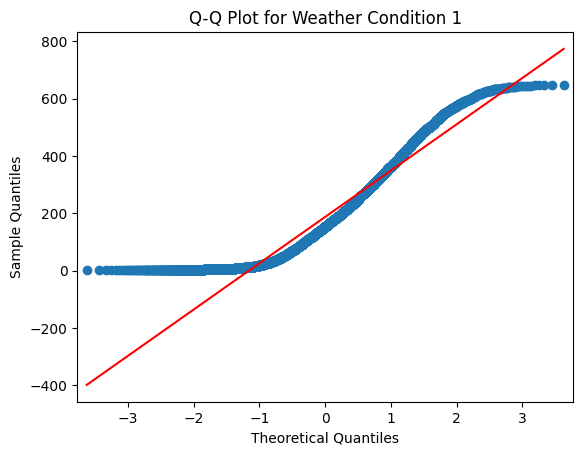

<Figure size 600x600 with 0 Axes>

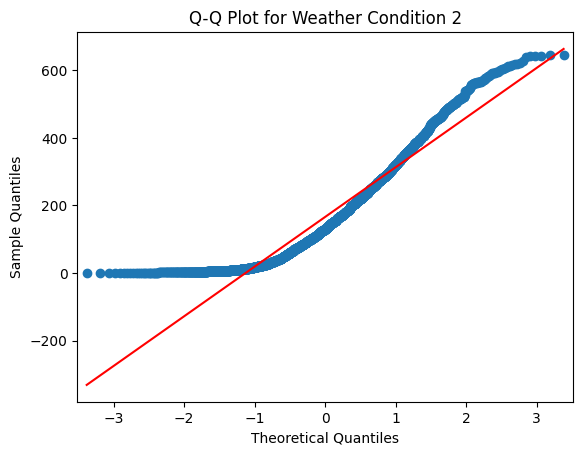

<Figure size 600x600 with 0 Axes>

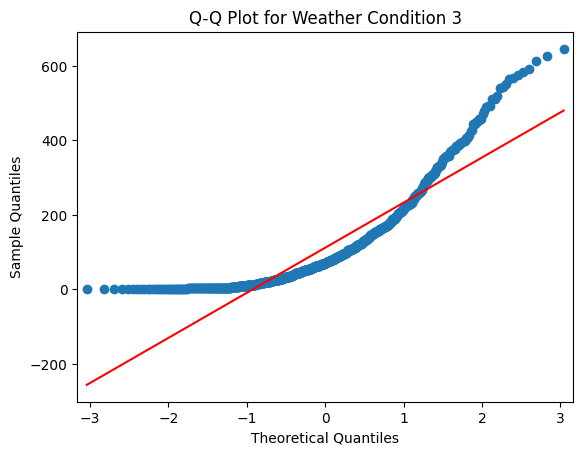

<Figure size 600x600 with 0 Axes>

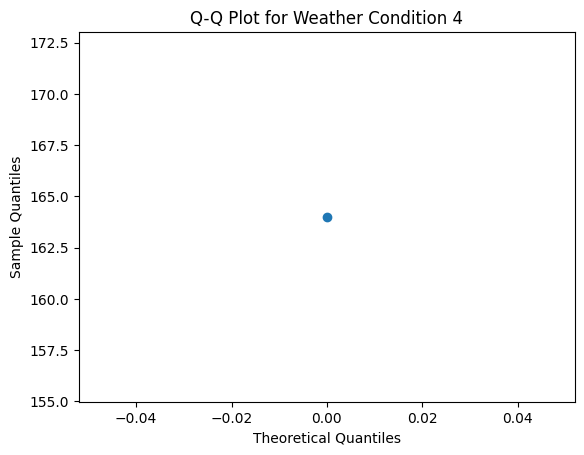

In [ ]:
from statsmodels.graphics.gofplots import qqplot
for weather in df['weather'].unique():
    plt.figure(figsize=(6, 6))
    weather_data = df[df['weather'] == weather]['count']
    qqplot(weather_data, line="s")
    plt.title(f'Q-Q Plot for Weather Condition {weather}')
    plt.show()

In [ ]:
wheather_group = df.groupby('weather')['count'].count()
wheather_group

weather
1    6965
2    2770
3     850
4       1
Name: count, dtype: int64

In [ ]:
from scipy.stats import shapiro
stat, p_value = shapiro(wheather_group)
stat, p_value

(0.9022211065423918, 0.44217533280841637)

In [ ]:
if p_value < 0.05:
    print("There is a significant difference data for wheather is not normal.")
else:
    print("There is a significant difference data for wheather is  normal.")

There is a significant difference data for wheather is  normal.


In [ ]:
from scipy.stats import skew
weather_conditions = df['weather'].unique()
skewness_values = {condition: skew(df[df['weather'] == condition]['count']) for condition in weather_conditions}
skewness_values

{1: 0.8198665451201651, 2: 0.9520388707324102, 3: 1.7048485466914007, 4: nan}

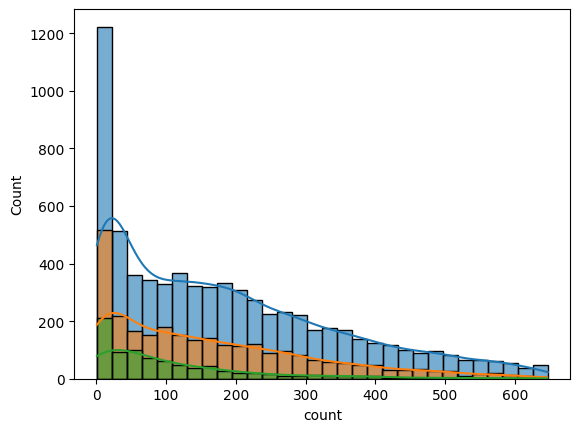

In [ ]:
for condition in weather_conditions:
    sns.histplot(df[df['weather'] == condition]['count'], bins=30, kde=True, label=f'Weather {condition}', alpha=0.6)

In [ ]:
from scipy.stats import kurtosis
kurtosis_values = [kurtosis(df[df['weather'] == condition]['count'], fisher=True) for condition in weather_conditions]
kurtosis_dict = {condition: kurtosis(df[df['weather'] == condition]['count'], fisher=True) for condition in weather_conditions}
for condition, kurt in kurtosis_dict.items():
  print(f'Weather condition {condition}: kurtosis = {kurt}')


Weather condition 1: kurtosis = -0.1710996648630725
Weather condition 2: kurtosis = 0.23895903087890114
Weather condition 3: kurtosis = 2.926061500141695
Weather condition 4: kurtosis = nan


In [ ]:
from scipy.stats import levene
weather_conditions = df['weather'].unique()
count_data = [df[df['weather'] == condition]['count'] for condition in weather_conditions]
stat, p_value = levene(*count_data)
stat, p_value

(58.699303151914386, 1.2566715363063703e-37)

In [ ]:
if p_value < 0.05:
    print(" population variances within the groups are not equal  ")
else:
    print("population variances within the groups are  equal")


 population variances within the groups are not equal  


In [ ]:
from scipy.stats import kruskal
wheather_groups = [df[df['weather'] == condition]['count'].values for condition in df['weather'].unique()]
stat, p_value = kruskal(*wheather_groups)
stat, p_value

(187.56969292419032, 2.0444534638690485e-40)

In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences between the weather conditions in Bike Renting .")
else:
    print("Fail to reject the null hypothesis: No significant differences between the weather conditions Bike Renting .")

Reject the null hypothesis: There are significant differences between the weather conditions in Bike Renting .


<Figure size 600x600 with 0 Axes>

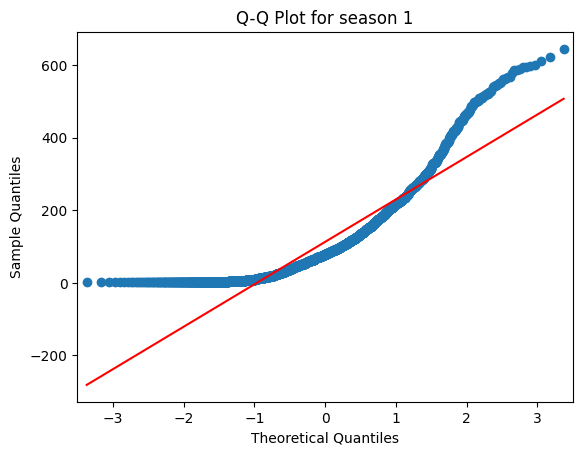

<Figure size 600x600 with 0 Axes>

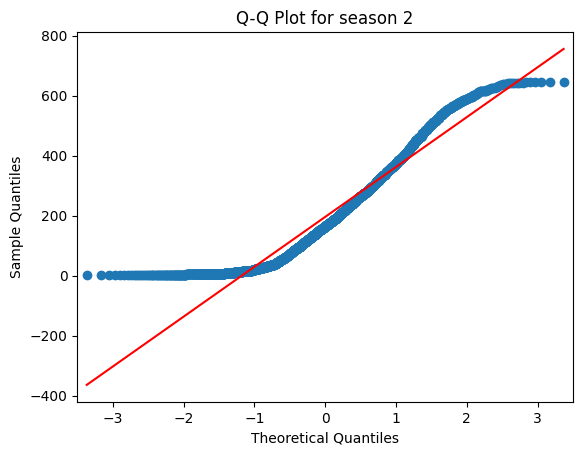

<Figure size 600x600 with 0 Axes>

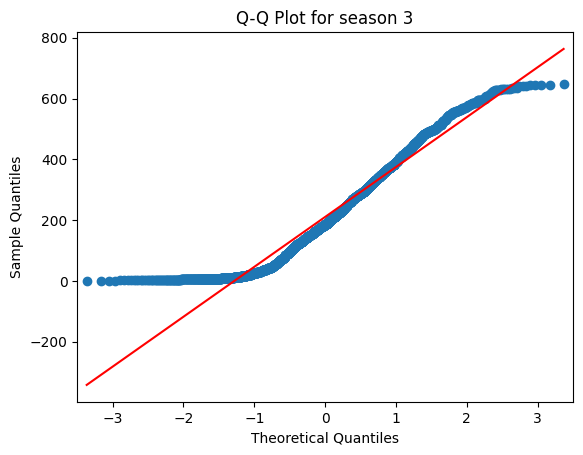

<Figure size 600x600 with 0 Axes>

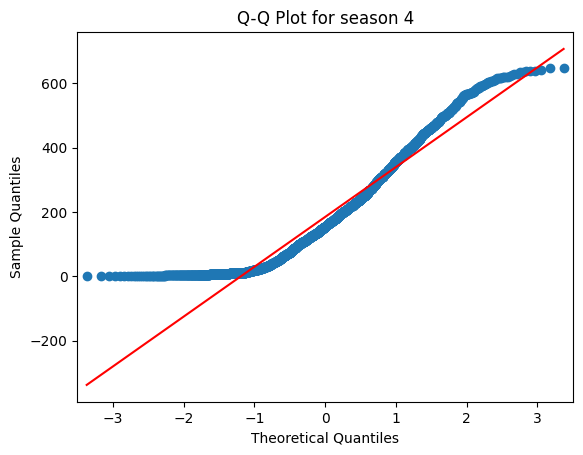

In [ ]:
for season in df['season'].unique():
    plt.figure(figsize=(6, 6))
    seasons = df[df['season'] == season]['count']
    qqplot(seasons, line="s")
    plt.title(f'Q-Q Plot for season {season}')
    plt.show()

In [ ]:
stat, p_value = shapiro(seasons)
stat, p_value

(0.9188978279301656, 1.2267606813118504e-35)

In [ ]:
if p_value < 0.05:
    print("There is a significant difference data for season is not normal.")
else:
    print("There is a significant difference data for season is  normal.")


There is a significant difference data for season is not normal.


In [ ]:
season = df['season'].unique()
skewness_values = {condition: skew(df[df['season'] == condition]['count']) for condition in season}
skewness_values

{1: 1.636020088442249,
 2: 0.7712611567587742,
 3: 0.5725638112920233,
 4: 0.8106559230006674}

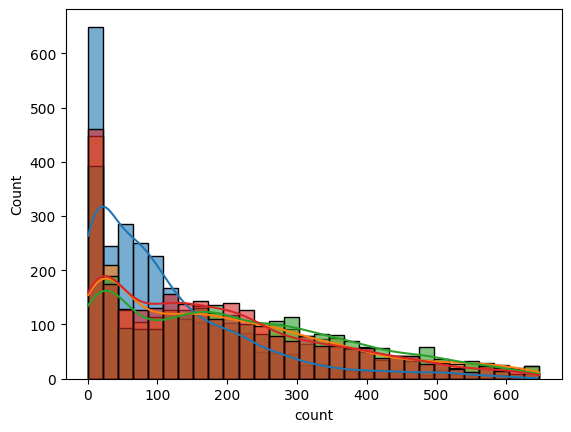

In [ ]:
for Season in season:
  sns.histplot(df[df['season'] == Season]['count'], bins=30, kde=True,alpha=0.6)

In [ ]:
kurtosis_values = [kurtosis(df[df['season'] == condition]['count'], fisher=True) for condition in weather_conditions]
kurtosis_dict = {condition: kurtosis(df[df['season'] == condition]['count'], fisher=True) for condition in weather_conditions}
for condition, kurt in kurtosis_dict.items():
  print(f'Season {condition}: kurtosis = {kurt}')

Season 1: kurtosis = 2.808723741192331
Season 2: kurtosis = -0.2619052279173708
Season 3: kurtosis = -0.5651668933309617
Season 4: kurtosis = -0.09307054313695629


In [ ]:
from scipy.stats import levene
differnt_Seasons = df['season'].unique()
count_data = [df[df['season'] == condition]['count'] for condition in differnt_Seasons]
stat, p_value = levene(*count_data)
stat, p_value

(177.84047176737855, 1.6939424019616345e-112)

In [ ]:
if p_value < 0.05:
    print(" population variances within the seasons are not equal  ")
else:
    print("population variances within the seasons are  equal")


 population variances within the seasons are not equal  


In [ ]:
differnt_Seasons = [df[df['weather'] == condition]['count'].values for condition in df['season'].unique()]
stat, p_value = kruskal(*differnt_Seasons)
stat, p_value

(187.56969292419032, 2.0444534638690485e-40)

In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Demand for bike is not  same for diffent season .")
else:
    print("Fail to reject the null hypothesis: Demand for bikes is same for diifernt seasons")

Reject the null hypothesis: Demand for bike is not  same for diffent season .


In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['season'], df['weather'])
contingency_table

weather,1,2,3,4
season,,,,
1,1744,714,211,1
2,1721,690,223,0
3,1843,579,195,0
4,1657,787,221,0


In [ ]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between weather conditions and seasons.")
else:
    print("Fail to reject the null hypothesis: No significant association between weather conditions and seasons.")

Reject the null hypothesis: There is a significant association between weather conditions and seasons.
